# Classification 

In this example, we will classify mushrooms as being edible or poisonous depending on different features. Logistic regression, linear discriminant analysis and quadratic discriminant analysis will be used.

The data set contains 8124 rows and the following features:

`class`: edible(e) or poisonous(p)

`cap-shape`: bell(b), conical(c), convex(x), flat(f), knobbed(k), sunken(s)

`cap-surface`: fibrous(f), grooves(g), scaly(y), smooth(s)

`cap-color`: brown(n), buff(b), cinnamon(c), gray(g), green(r), pink(p), purple(u), red(e), white(w), yellow(y)

`bruises`: bruises(t), no bruises(f)

`odor`: almond(a), anise(l), creosote(c), fishy(y), foul(f), musty(m), none(n), pungent(p), spicy(s)

`gill-attachment`: attached(a), descending(d), free(f), notched(n)

`gill-spacing`: close(c), crowded(w), distant(d)

`gill-size`: broad(b), narrow(n)

`gill-color`: black(k), brown(n), buff(b), chocolate(h), gray(g), green(r), orange(o), pink(p), purple(u), red(e), white(w), yellow(y)

`stalk-shape`: enlarging(e), tapering(t)

`stalk-root`: bulbous(b), club(c), cup(u), equal(e), rhizomorphs(z), rooted(r), missing(?)

`stalk-surface-above-ring`: fibrous(f), scaly(y), silky(k), smooth(s)

`stalk-surface-below-ring`: fibrous(f), scaly(y), silky(k), smooth(s)

`stalk-color-above-ring`: brown(n), buff(b), cinnamon(c), gray(g), orange(o), pink(p), red(e), white(w), yellow(y)

`stalk-color-below-ring`: brown(n), buff(b), cinnamon(c), gray(g), orange(o), pink(p), red(e), white(w), yellow(y)

`veil-type`: partial(p), universal(u)

`veil-color`: brown(n), orange(o), white(w), yellow(y)

`ring-number`: none(n), one(o), two(t)

`ring-type`: cobwebby(c), evanescent(e), flaring(f), large(l), none(n), pendant(p), sheathing(s), zone(z)

`spore-print-color`: black(k), brown(n), buff(b), chocolate(h), green(r), orange(o), purple(u), white(w), yellow(y)

`population`: abundant(a), clustered(c), numerous(n), scattered(s), several(v), solitary(y)

`habitat`: grasses(g), leaves(l), meadows(m), paths(p), urban(u), waste(w), woods(d)

## Import libraries 

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix

%matplotlib inline

In [2]:
DATAPATH = 'data/mushrooms.csv'

data = pd.read_csv(DATAPATH)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


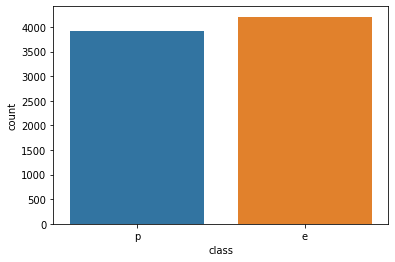

In [3]:
x = data['class']

ax = sns.countplot(x=x, data=data)

In [4]:
def plot_data(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        ax = sns.countplot(x=data[col], hue=hue, data=data)

## Preprocessing

In [5]:
for col in data.columns:
    print("{} : {}".format(col, data[col].isnull().sum()))

class : 0
cap-shape : 0
cap-surface : 0
cap-color : 0
bruises : 0
odor : 0
gill-attachment : 0
gill-spacing : 0
gill-size : 0
gill-color : 0
stalk-shape : 0
stalk-root : 0
stalk-surface-above-ring : 0
stalk-surface-below-ring : 0
stalk-color-above-ring : 0
stalk-color-below-ring : 0
veil-type : 0
veil-color : 0
ring-number : 0
ring-type : 0
spore-print-color : 0
population : 0
habitat : 0


In [6]:
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
encoded_data = pd.get_dummies(data)

encoded_data.head(5)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## Model 

In [9]:
y = data['class'].values.reshape(-1, 1)
X = encoded_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic regression 

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logistc_reg = LogisticRegression()

logistc_reg.fit(X_train, y_train.ravel())

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_prob = logistc_reg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [29]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)

confusion_matrix

array([[843,   0],
       [  0, 782]], dtype=int64)

In [20]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

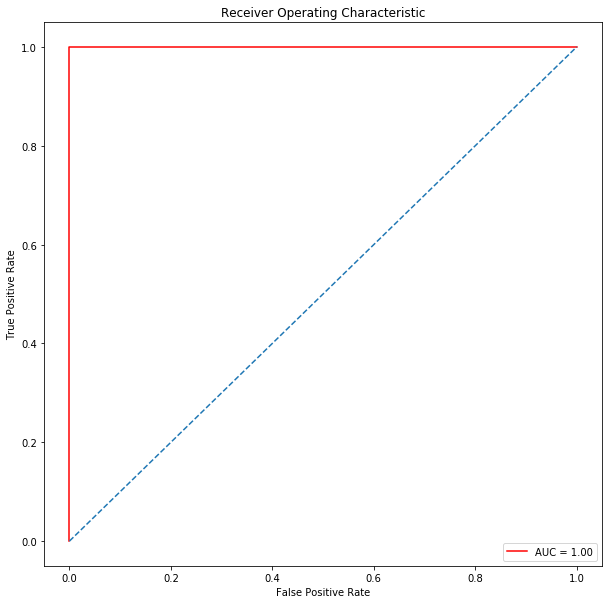

In [21]:
def plot_roc(roc_auc):
    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
plot_roc(roc_auc)

### Linear Discriminant Analysis (LDA) 

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [23]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.ravel())

y_prob_lda = lda.predict_proba(X_test)[:,1]
y_pred_lda = np.where(y_prob > 0.5, 1, 0)

D:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [28]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_lda)

confusion_matrix

array([[843,   0],
       [  0, 782]], dtype=int64)

In [30]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(false_positive_rate, true_positive_rate)
roc_auc_lda

1.0

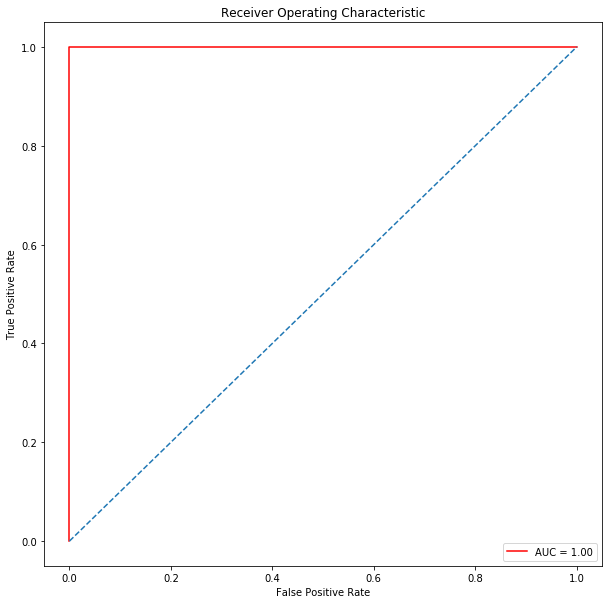

In [31]:
plot_roc(roc_auc_lda)

### Quadratic Discriminant Analysis (QDA) 

In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [34]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train.ravel())

y_prob_qda = lda.predict_proba(X_test)[:,1]
y_pred_qda = np.where(y_prob > 0.5, 1, 0)

D:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [35]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_qda)

confusion_matrix

array([[843,   0],
       [  0, 782]], dtype=int64)

In [36]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(false_positive_rate, true_positive_rate)
roc_auc_qda

1.0

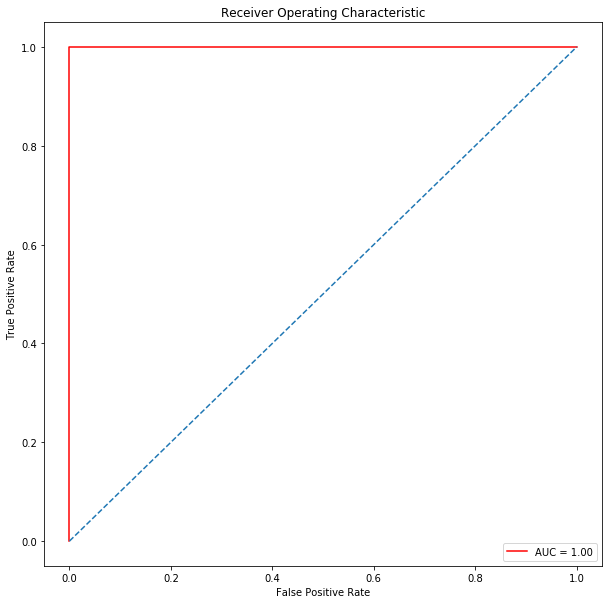

In [37]:
plot_roc(roc_auc_qda)